# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [15]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [16]:
df["Diff"] = df["Adj Close"].diff().shift(-1)

#Target
df["Target"] = np.sign(df["Diff"])
#Premium
df["Premium"] = 0.08*df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [19]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30", :].copy()

In [20]:
#fit a logistic regression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [21]:
y_pred = logreg.predict(X)

In [22]:
df["Predictions"] = y_pred

In [23]:
df["Profits"] = 0.

In [26]:
df.loc[(df["Target"] == 1) & (df["Predictions"] == 1),"Profits"] = df["Premium"] #rows and columns that we're slicing
df.loc[(df["Target"] == -1) & (df["Predictions"] == 1),"Profits"] = (100*df["Diff"])

# 5.) Plot profits over time

[]

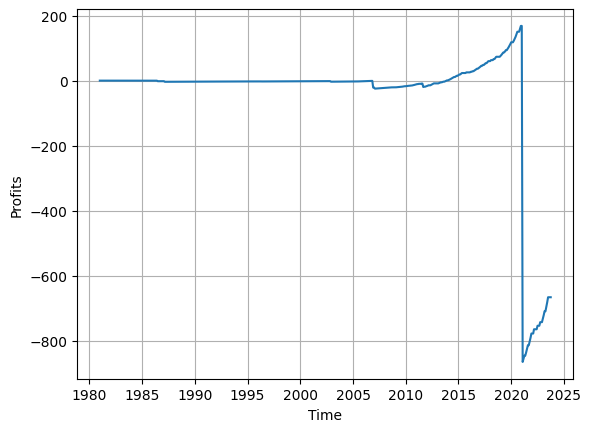

In [31]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Profits")
plt.plot()
#covid caused drop

### 5.5.) The talk by PJ and Philip Liu was very insightful on the crypto space. I am also interested in crypto mining that Philip mentioned in class, and would like to know more about it in the future. Understanding the PJ and Philip Liu are at the forefront of digital currencies, I believe my data analytics skills and continuous learning ability would be valued in the workplace. Cryptocurrencies are known for their volatility and complex market dynamics, and data analytics skills can help analyze the market trend, understanding patterns and build predictive models. I think this is crucial on crypto marketing strategies. And continuous learning ability would be valued because it is important to stay updated with emerging technology in the crypto world such as blockchain platforms and crypto assets.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.